In [486]:
#Load Libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [368]:
#Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

<table border = "2">
    <tr>
        <th>
            Label
        </th>
        <th>
            Description
        </th>
    </tr>
    <tr>
        <td> 0</td>
        <td>T-shirt/top</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Trouser</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pullover</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Dress</td>
    </tr>
    <tr>
        <td>4</td>
        <td>Coat</td>
    </tr>
    <tr>
        <td>5</td>
        <td>Sandal</td>
    </tr>
    <tr>
        <td>6</td>
        <td>Shirt</td>
    </tr>
    <tr>
        <td>7</td>
        <td>Sneakerr</td>
    </tr>
    <tr>
        <td>8</td>
        <td>Bag</td>
    </tr>
    <tr>
        <td>9</td>
        <td>Ankle boot</td>
    </tr>
</table>

In [373]:
#Shape of the data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [375]:
#Normalize data

x_train = x_train/255.0
x_test = x_test / 255.0

2


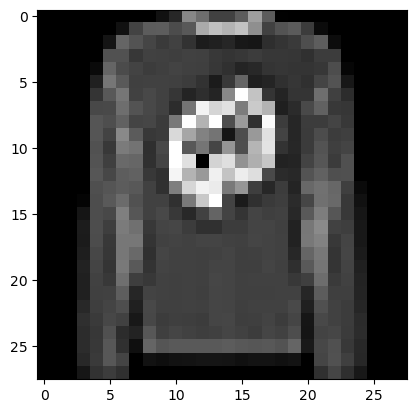

In [379]:
plt.imshow(x_train[123], cmap ='grey')
print(y_train[123])
plt.show()

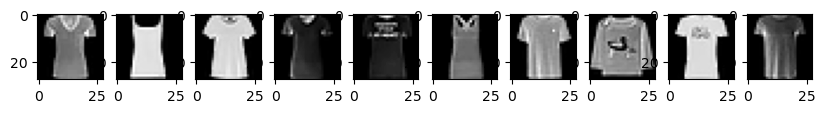

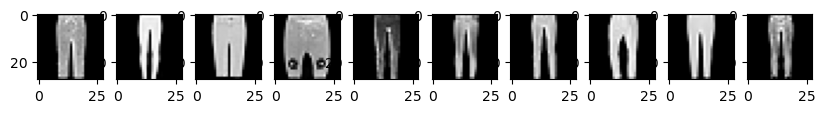

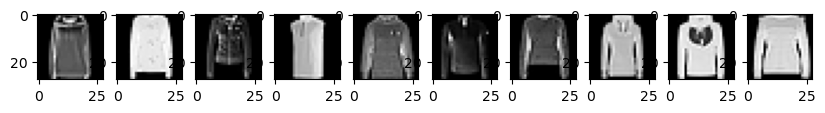

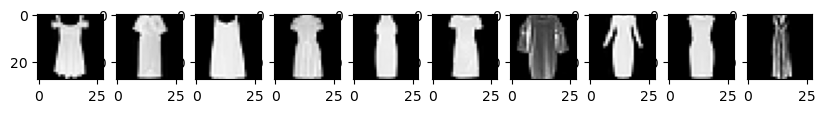

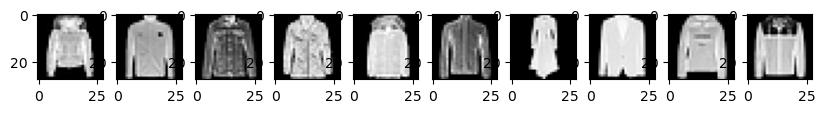

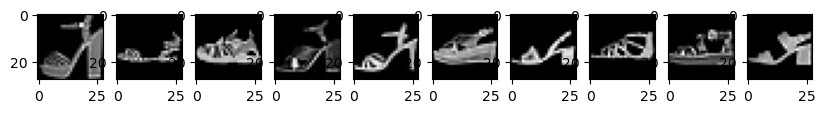

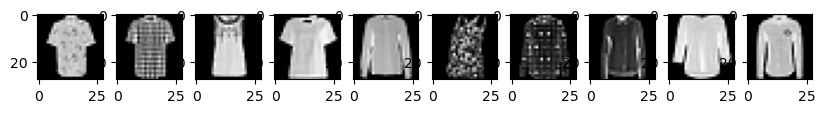

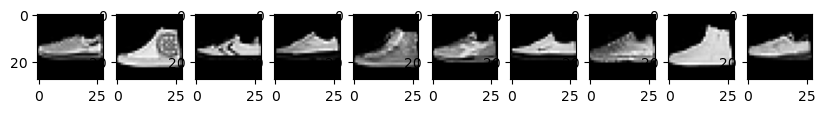

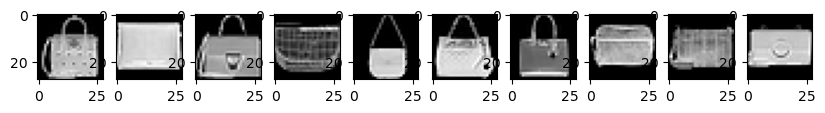

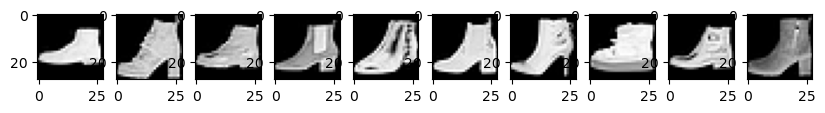

In [381]:
for num in range(0,10):

    index = np.random.choice(np.where( y_train == num)[0], 10)
    
    plt.figure(figsize = (10,10))
               
    for e, i in enumerate(index):
        plt.subplot(1,10,e+1)
        plt.imshow(x_train[i], cmap ='gray')
    plt.show()

In [383]:
y_train = tf.keras.utils.to_categorical(y_train)

In [442]:
#Delete earlier model to re-run
#del model

In [444]:
def model_func(hidden_layer1_neuron, hidden_layer2_neuron, x, y, epoch, batch_size, lr):

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((28,28) , name= 'InputLayer'))
    model.add(tf.keras.layers.Flatten(name = 'FlatLayer'))
    model.add(tf.keras.layers.Dense(hidden_layer1_neuron, activation = tf.keras.activations.relu, name = 'HiddenLayer1'))
    model.add(tf.keras.layers.Dense(hidden_layer2_neuron, activation = tf.keras.activations.relu, name = 'HiddenLayer2'))
    model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax , name = 'OutputLayer'))

    model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.SGD(learning_rate = lr),
              metrics = ["acc"])

    model.fit( x = x_train,
              y = y_train,
              epochs = epoch,
              batch_size = batch_size,
              validation_split = 0.1)

    score = pd.DataFrame()
    score['val_loss'] = model.history.history['val_loss']
    score['loss'] = model.history.history['loss']
    score['acc'] = model.history.history['acc']
    score['val_acc'] = model.history.history['val_acc']

    plt.subplot(1, 2, 1)
    plt.figure( figsize = (5,5))
    plt.title('Acc vs Val Acc')
    plt.plot(model.history.history['acc'] , label = 'Acc' +str(batch_size))
    plt.plot(model.history.history['val_acc'] , label = 'Val Acc' +str(batch_size))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.figure( figsize = (5,5))
    plt.title('Loss vs Val Loss')
    plt.plot(model.history.history['loss'] , label = 'Loss' +str(batch_size))
    plt.plot(model.history.history['val_loss'] , label = 'Val Loss' +str(batch_size))
    plt.legend()
  
    return(model, score)

In [488]:
#Run Model

In [446]:
(model, score) = model_func(hidden_layer1_neuron =128, hidden_layer2_neuron = 32, x = x_train, y = y_train, epoch = 10, batch_size = 64, lr = 0.01)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5853 - loss: 1.2807 - val_acc: 0.7742 - val_loss: 0.6475
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7880 - loss: 0.6164 - val_acc: 0.8170 - val_loss: 0.5421
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8177 - loss: 0.5301 - val_acc: 0.8182 - val_loss: 0.5118
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8302 - loss: 0.4853 - val_acc: 0.8248 - val_loss: 0.4863
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8395 - loss: 0.4579 - val_acc: 0.8340 - val_loss: 0.4681
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8435 - loss: 0.4469 - val_acc: 0.8478 - val_loss: 0.4435
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8513 - loss: 0.4311 - val_acc: 0.8438 - val_loss: 0.4461
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8553 - loss: 0.4185 - val_acc: 0.8393 - val_loss: 0.4413
Epoch 9/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

In [447]:
score

,val_loss,loss,acc,val_acc
0,0.647501,0.933886,0.688056,0.774167
1,0.542076,0.585337,0.797481,0.817000
2,0.511824,0.517007,0.821315,0.818167
3,0.486311,0.480641,0.833370,0.824833
4,0.468100,0.458848,0.839444,0.834000
5,0.443541,0.442647,0.845648,0.847833
6,0.446149,0.430424,0.850204,0.843833
7,0.441314,0.419304,0.854389,0.839333
8,0.413041,0.409220,0.856556,0.853167
9,0.416407,0.401812,0.859944,0.849167


In [490]:
#Model Summary

In [448]:
model_func(128, 32, x_train, y_train, 20, 64, 0.01)[0].summary()

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.5618 - loss: 1.3429 - val_acc: 0.7757 - val_loss: 0.6399
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7851 - loss: 0.6203 - val_acc: 0.8122 - val_loss: 0.5419
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8202 - loss: 0.5296 - val_acc: 0.8263 - val_loss: 0.4974
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8301 - loss: 0.4938 - val_acc: 0.8312 - val_loss: 0.4782
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8371 - loss: 0.4673 - val_acc: 0.8392 - val_loss: 0.4550
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8489 - loss: 0.4432 - val_acc: 0.8463 - val_loss: 0.4319
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8518 - loss: 0.4301 - val_acc: 0.8468 - val_loss: 0.4291
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8543 - loss: 0.4176 - val_acc: 0.8503 - val_loss: 0.4268
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - ac

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ FlatLayer (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,940 (409.93 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [492]:
#Delete earlier dictionary to re-run
#del model_dict

In [494]:
#Creating different dictionaries for different band size

In [452]:
model_dict ={}

for bs in [16, 32, 64, 128, 256, 512, 1024]:
    model_dict[bs] = model_func(128, 32, x_train, y_train, 10, bs, 0.01)

Epoch 1/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.6867 - loss: 0.9567 - val_acc: 0.8237 - val_loss: 0.4958
Epoch 2/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8328 - loss: 0.4786 - val_acc: 0.8457 - val_loss: 0.4515
Epoch 3/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8502 - loss: 0.4263 - val_acc: 0.8565 - val_loss: 0.4021
Epoch 4/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - acc: 0.8634 - loss: 0.3917 - val_acc: 0.8527 - val_loss: 0.4124
Epoch 5/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 954us/step - acc: 0.8682 - loss: 0.3722 - val_acc: 0.8623 - val_loss: 0.3775
Epoch 6/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - acc: 0.8747 - loss: 0.3459 - val_acc: 0.8687 - val_loss: 0.3670
Epoch 7/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 988us/step - acc: 0.8803 - loss: 0.3344 - val_acc: 0.8712 - val_loss: 0.3644
Epoch 8/10
3375/3375 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - acc: 0.8836 - loss: 0.3228 - val_acc: 0.8643 - val_loss: 0.3789
Epoch 9/10
3375/3375 ━━━━━━━━━━━

C:\Users\sdeek\AppData\Local\Temp\ipykernel_34028\165994938.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure( figsize = (5,5))


In [453]:
model_dict[128][1]

,val_loss,loss,acc,val_acc
0,0.746518,1.133569,0.646500,0.746833
1,0.615826,0.685444,0.771704,0.797500
2,0.556436,0.593700,0.803667,0.815667
3,0.524218,0.543363,0.819648,0.825667
4,0.496893,0.510704,0.826537,0.829167
5,0.498853,0.489494,0.833389,0.825167
6,0.465969,0.472007,0.839537,0.841333
7,0.471383,0.457426,0.844037,0.835000
8,0.451598,0.447384,0.846537,0.845667
9,0.448648,0.438421,0.849148,0.840333


In [496]:
#Validation loss for different band size

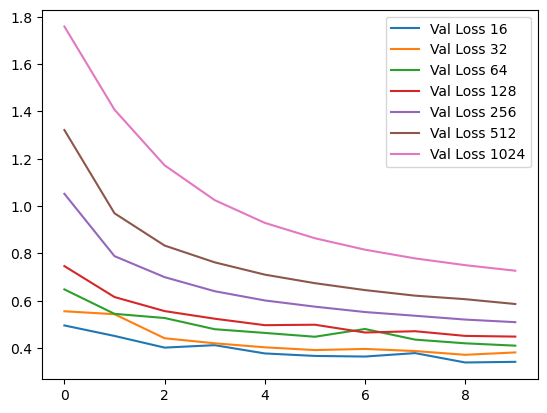

In [476]:
for bs in [16, 32, 64, 128, 256, 512, 1024]:
    plt.plot(model_dict[bs][1].val_loss, label = 'Val Loss ' +str(bs))
plt.legend(loc = 'upper right')
plt.show()

In [455]:
from sklearn.metrics import confusion_matrix, classification_report

In [462]:
y_pred_probs = model.predict(x_test)         # probabilities
y_pred = np.argmax(y_pred_probs, axis=1)     # class with highest probability

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


In [480]:
# Class labels for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

<Figure size 1000x800 with 0 Axes>

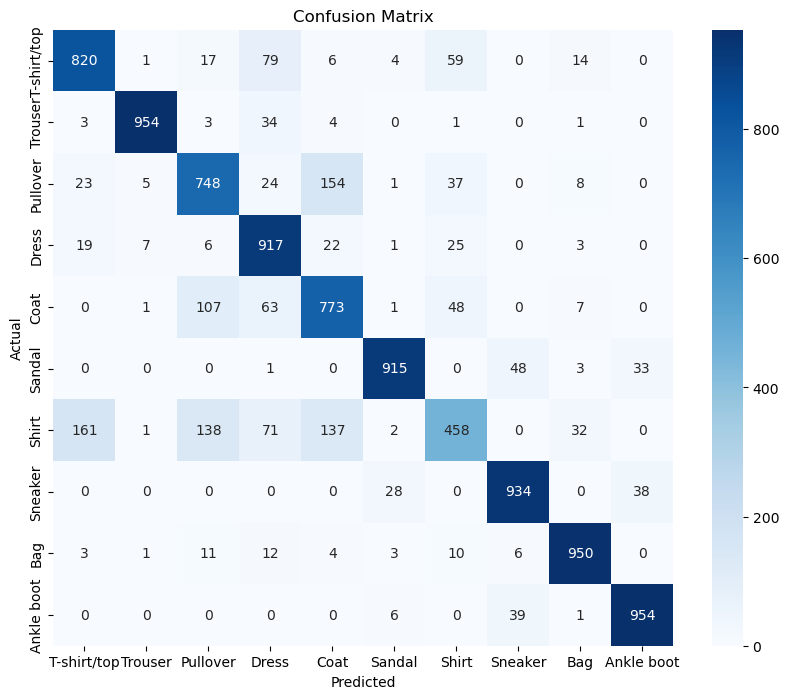

In [482]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [484]:
#Classification report

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.73      0.75      0.74      1000
       Dress       0.76      0.92      0.83      1000
        Coat       0.70      0.77      0.74      1000
      Sandal       0.95      0.92      0.93      1000
       Shirt       0.72      0.46      0.56      1000
     Sneaker       0.91      0.93      0.92      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

